<a href="https://colab.research.google.com/github/sukruta230901/Machine-Learning-Project/blob/main/Campus_Recruitment_EDA_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Recruitment 


### Data Description 

sl_no: Serial Number,
gender: Gender- Male='M',Female='F',
ssc_p: Secondary Education percentage- 10th Grade,
ssc_b: Board of Education- Central/ Others,
hsc_p: Higher Secondary Education percentage- 12th Grade,
hsc_b: Board of Education- Central/ Others,
hsc_s: Specialization in Higher Secondary Education,
degree_p: Degree Percentage,
degree_t: Under Graduation(Degree type)- Field of degree education,
workex: Work Experience,
etest_p: Employability test percentage ( conducted by college),
specialisation: Post Graduation(MBA)- Specialization,
mba_p: MBA percentage,
status: Status of placement- Placed/Not placed,
salary: Salary offered by corporate to candidates.

#### The goal is to predict the salary of employees using regression models 

## Importing the Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset 

In [ ]:
df = pd.read_csv("Placement_Data_Full_Class_1.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_t,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,Sci&Tech,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,Sci&Tech,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,Comm&Mgmt,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,Sci&Tech,52.00,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,Comm&Mgmt,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.shape

(215, 15)

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_t', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
#there are 8 object data that needs to be converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_t        215 non-null    object 
 8   degree_p        215 non-null    float64
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Descriptive Data Analysis 

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.describe(include ='object')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df = df.drop('sl_no',axis=1)
df['salary'] = df['salary'].fillna(0)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_t,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,Sci&Tech,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,Sci&Tech,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,Comm&Mgmt,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,Sci&Tech,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,Comm&Mgmt,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Visualization

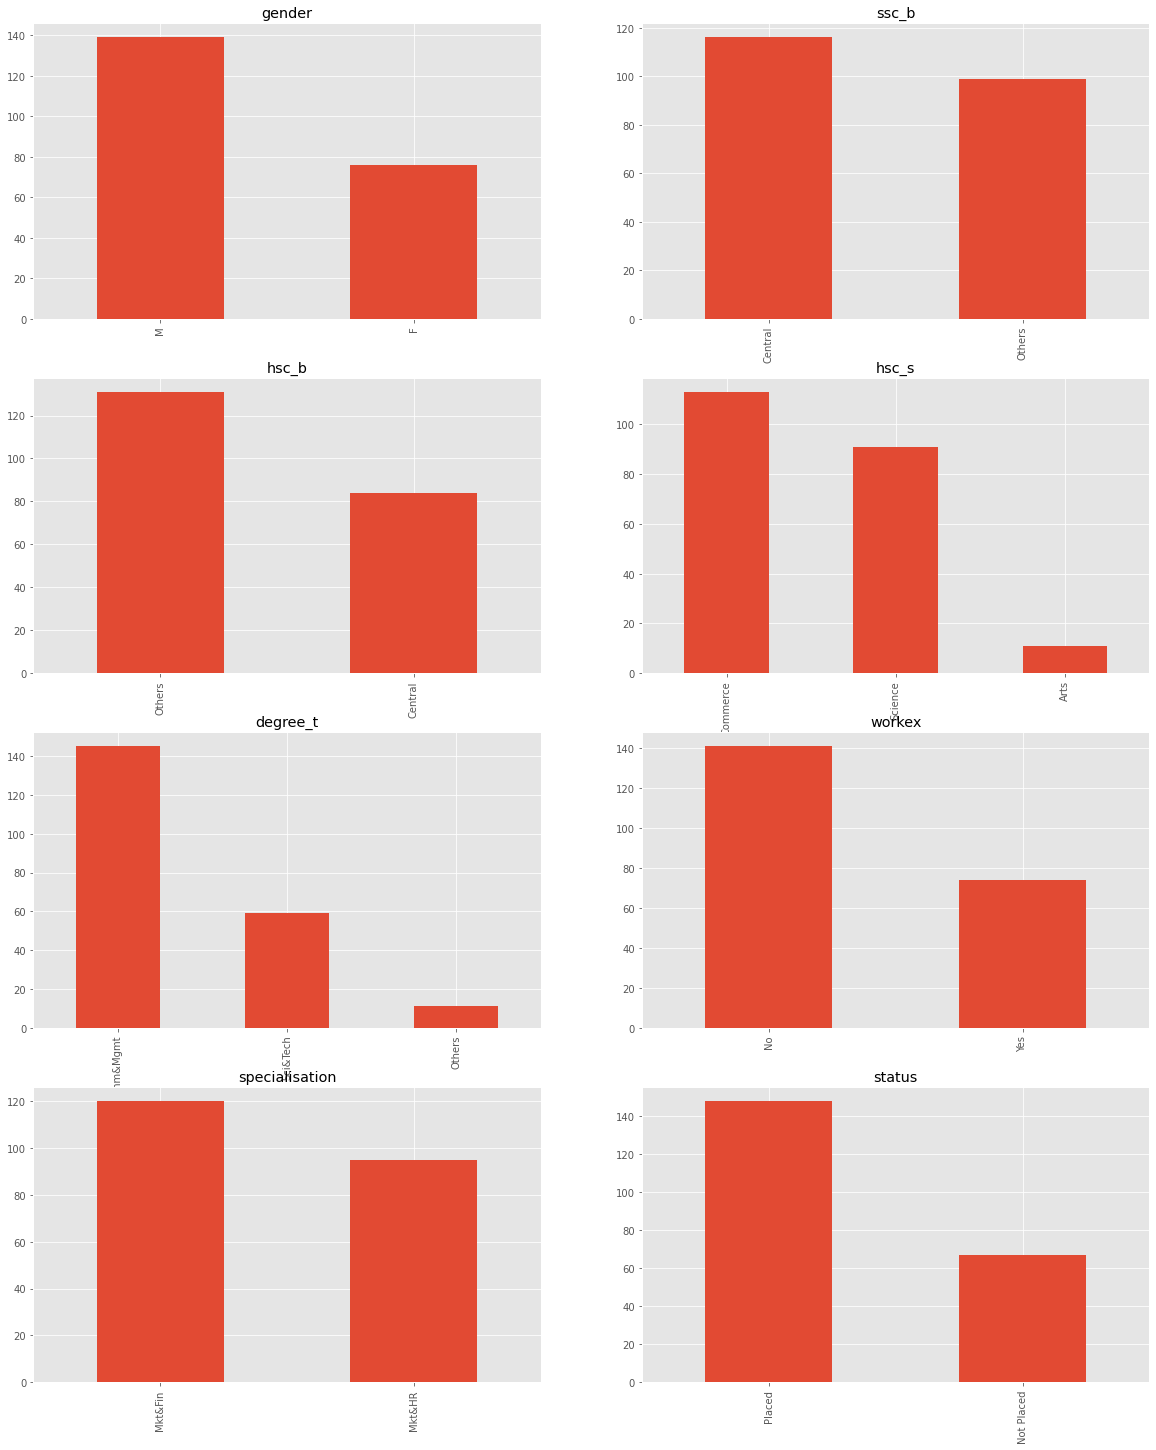

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
df['gender'].value_counts().plot(kind='bar',title='gender')
plt.subplot(4,2,2)
df['ssc_b'].value_counts().plot(kind='bar',title='ssc_b')
plt.subplot(4,2,3)
df['hsc_b'].value_counts().plot(kind='bar',title='hsc_b')
plt.subplot(4,2,4)
df['hsc_s'].value_counts().plot(kind='bar',title='hsc_s')
plt.subplot(4,2,5)
df['degree_t'].value_counts().plot(kind='bar',title='degree_t')
plt.subplot(4,2,6)
df['workex'].value_counts().plot(kind='bar',title='workex')
plt.subplot(4,2,7)
df['specialisation'].value_counts().plot(kind='bar',title='specialisation')
plt.subplot(4,2,8)
df['status'].value_counts().plot(kind='bar',title='status')
plt.show()

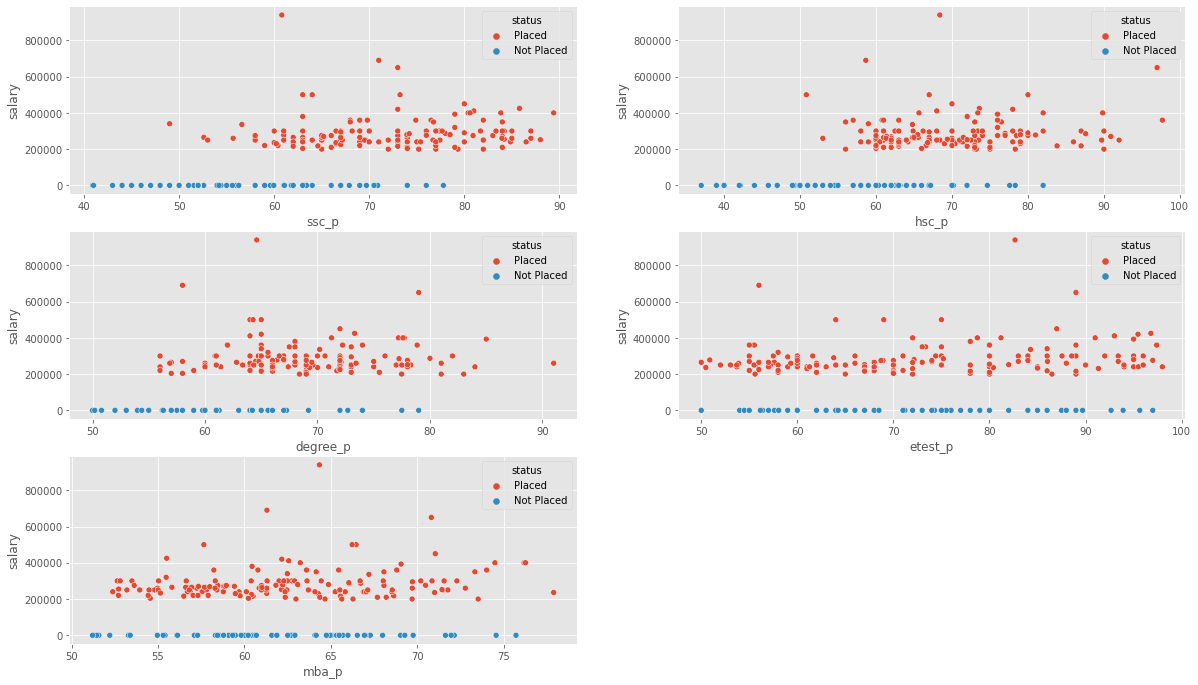

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="status")
plt.subplot(5,2,2)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="status")
plt.subplot(5,2,3)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="status")
plt.subplot(5,2,4)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="status")
plt.subplot(5,2,5)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="status")
plt.show()

# Data Preprocessing

## Encoding of categorical values using Label Encoder

In [ ]:
# using label encoder beacuse the below columns are ordinal attributes
# replaces the attributes with 0,1 and 2 in alphabetically appearing columns 
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ssc_b', 'hsc_b','hsc_s', 'degree_t','workex','specialisation', 'status']
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_t,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,2,58.00,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,2,77.48,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,0,64.00,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,2,52.00,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,0,73.30,0,96.8,0,55.50,1,425000.0


## Extract the independent (input) and dependent (output) variable 

In [ ]:
# extracting independent variable
X = df.iloc[:,:-1].values
# extracting dependent variable
Y = df.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(215, 13)
(215,)


## Splitting the dataset into the Training and Testing sets 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 100)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(193, 13) (193,)
(22, 13) (22,)


# Normalization of Dataset

## Standardize the data 

In [ ]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train-X_mean)/X_std

X_test = (X_test-X_mean)/X_std

print(X_train.shape, X_test.shape)

(193, 13) (22, 13)


# Training Model using Regression algorithms

### 1. Linear Regressor
### 2. Decision Tree Regressor
### 3. Random Forest Regressor
### 4. XGBoost Regressor

## Importing Libraries 

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Linear Regression 

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

print("Train accuracy:", (l_reg.score(X_train,Y_train))*100)
print("Test accuracy:", (l_reg.score(X_test,Y_test))*100)

Train accuracy: 76.3828832191453
Test accuracy: 85.60146942003244


In [ ]:
print(l_reg.coef_)
print("B0 =",l_reg.intercept_)

[ 12234.43451024 -10622.82320419    964.30652667   4470.24938464
  -4504.24494935   1247.39953697  10731.12058715  -7649.35560339
   2068.55757747  10075.07342943  -6793.57170367  14036.64322583
 135401.63929681]
B0 = 202419.68911917097


In [ ]:
Y_pred = l_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(22,) (22,)


In [ ]:
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")

R^2 score of model is 85.60146942003244 %
Root mean squared error is 57060.14364376707
Mean absolute error is 41062.68242618383


## Visualizing the results 

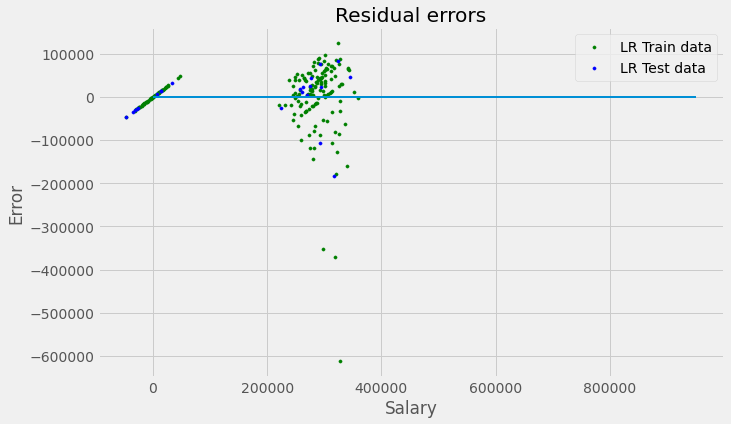

In [ ]:
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(10,6))
plt.scatter(l_reg.predict(X_train), l_reg.predict(X_train)-Y_train,
            color = "green", s = 10, label = 'LR Train data') 
plt.scatter(l_reg.predict(X_test), l_reg.predict(X_test)-Y_test,
            color = "blue", s = 10, label = 'LR Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 950000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Salary")
plt.ylabel("Error")
plt.show() 

## Decision Tree Regressor

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,Y_train)

print("Train accuracy:", (d_reg.score(X_train,Y_train))*100)
print("Test accuracy:", (d_reg.score(X_test,Y_test))*100)

Train accuracy: 100.0
Test accuracy: 84.68120387148743


In [ ]:
Y_pred = d_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(22,) (22,)


In [ ]:
r2_d = r2_score(Y_test, Y_pred)*100
rms_d = sqrt(mean_squared_error(Y_test, Y_pred))
mae_d = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_d} %")
print(f"Root mean squared error is {rms_d}")
print(f"Mean absolute error is {mae_d}")

R^2 score of model is 84.68120387148743 %
Root mean squared error is 58855.3697248989
Mean absolute error is 35500.0


## Random Forest Regressor 

In [ ]:
r_reg = RandomForestRegressor()
r_reg.fit(X_train,Y_train)

print("Training accuracy:",(r_reg.score(X_train,Y_train))*100)
print("Test accuracy:",(r_reg.score(X_test,Y_test))*100)

Training accuracy: 96.37099752781178
Test accuracy: 92.85293225481762


In [ ]:
Y_pred = r_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(22,) (22,)


In [ ]:
r2_r = r2_score(Y_test, Y_pred)*100
rms_r = sqrt(mean_squared_error(Y_test, Y_pred))
mae_r = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_r} %")
print(f"Root mean squared error is {rms_r}")
print(f"Mean absolute error is {mae_r}")

R^2 score of model is 92.85293225481762 %
Root mean squared error is 40201.080265901495
Mean absolute error is 23384.545454545456


## XGBoost Regressor 

In [ ]:
x_reg = XGBRegressor()
x_reg.fit(X_train,Y_train)

print("Training accuracy:",(x_reg.score(X_train,Y_train))*100)
print("Test accuracy:",(x_reg.score(X_test,Y_test))*100)

Training accuracy: 99.99999829029382
Test accuracy: 94.89749828047654


In [ ]:
Y_pred = x_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(22,) (22,)


In [ ]:
r2_x = r2_score(Y_test, Y_pred)*100
rms_x = sqrt(mean_squared_error(Y_test, Y_pred))
mae_x = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_x} %")
print(f"Root mean squared error is {rms_x}")
print(f"Mean absolute error is {mae_x}")

R^2 score of model is 94.89749828047654 %
Root mean squared error is 33967.638427095895
Mean absolute error is 20257.686935424805


# Evaluation Table

In [ ]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','Decision Tree Regressor', 
             'Random Forest Regressor',  'XGBoost Regressor'],
    'R^2 Score': [ r2_l, r2_d, r2_r, r2_x],
    'RMS Score' : [rms_l, rms_d, rms_r, rms_x],
    'MAE Score' : [mae_l, mae_d, mae_r, mae_x]
})

models.sort_values(by = ['R^2 Score', 'RMS Score', 'MAE Score'], ascending = True)

,Algorithm,R^2 Score,RMS Score,MAE Score
1,Decision Tree Regressor,84.681204,58855.369725,35500.000000
0,Linear Regression,85.601469,57060.143644,41062.682426
2,Random Forest Regressor,92.852932,40201.080266,23384.545455
3,XGBoost Regressor,94.897498,33967.638427,20257.686935


# Plotting the Residual Chart

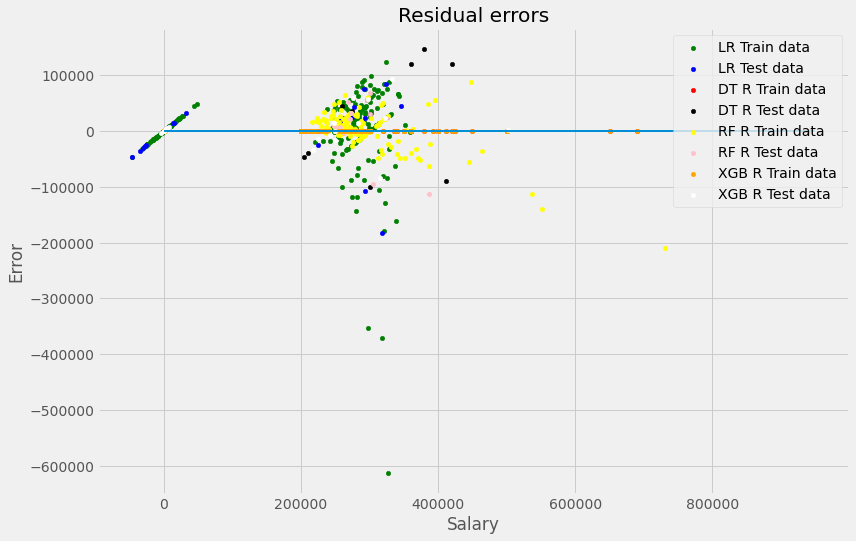

In [ ]:
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(12,8))
plt.scatter(l_reg.predict(X_train), l_reg.predict(X_train)-Y_train,
            color = "green", s = 20, label = 'LR Train data') 
plt.scatter(l_reg.predict(X_test), l_reg.predict(X_test)-Y_test,
            color = "blue", s = 20, label = 'LR Test data') 
plt.scatter(d_reg.predict(X_train), d_reg.predict(X_train)-Y_train,
            color = "red", s = 20, label = 'DT R Train data') 
plt.scatter(d_reg.predict(X_test), d_reg.predict(X_test)-Y_test,
            color = "black", s = 20, label = 'DT R Test data') 
plt.scatter(r_reg.predict(X_train), r_reg.predict(X_train)-Y_train,
            color = "yellow", s = 20, label = 'RF R Train data') 
plt.scatter(r_reg.predict(X_test), r_reg.predict(X_test)-Y_test,
            color = "pink", s = 20, label = 'RF R Test data') 
plt.scatter(x_reg.predict(X_train), x_reg.predict(X_train)-Y_train,
            color = "orange", s = 20, label = 'XGB R Train data') 
plt.scatter(x_reg.predict(X_test), x_reg.predict(X_test)-Y_test,
            color = "white", s = 20, label = 'XGB R Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 950000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Salary")
plt.ylabel("Error")
plt.show() 

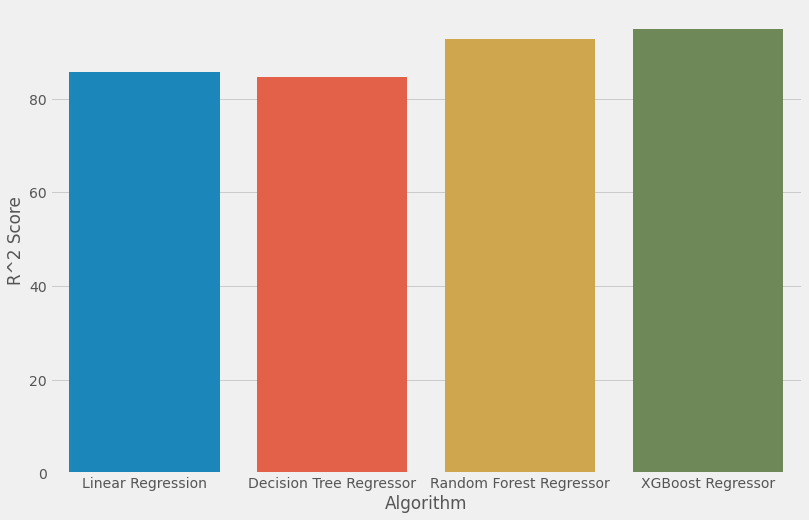

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.show()

# Cross-Validation of Models using K-fold CV

## Cross-Validation of Linear Regression Model

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(l_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = l_reg.predict(X_test)
r2_l = sklearn.metrics.r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2_l}')

Score Array list: [0.38827382 0.92096559 0.91129048 0.45366235 0.80962964 0.58375412
 0.88058478 0.90016116 0.88374671 0.53534407]


R^2 Score: 0.8560146942003244


## Cross-Validation of Decision Tree Regressor Model

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(d_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = d_reg.predict(X_test)
r2_d = sklearn.metrics.r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2_d}')

Score Array list: [0.19894758 0.75521649 0.79139884 0.46695123 0.77920449 0.53563901
 0.80903436 0.6824785  0.61472134 0.17325009]


R^2 Score: 0.8858934924304833


## Cross-Validation of Random Forest Model 

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
r_reg = RandomForestRegressor()
r_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(r_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = r_reg.predict(X_test)
r2_r = sklearn.metrics.r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2_r}')

Score Array list: [0.39000676 0.88214427 0.84692045 0.40702709 0.80633233 0.61086262
 0.86099609 0.87648244 0.85777242 0.47476471]


R^2 Score: 0.9313175796369


## Cross-Validation of XGBoost Regressor Model 

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
x_reg = XGBRegressor()
x_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(x_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = x_reg.predict(X_test)
r2_x = sklearn.metrics.r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2_x}')

Score Array list: [0.38094241 0.65658368 0.80945548 0.32290388 0.79559212 0.58836387
 0.83549735 0.86852351 0.76717067 0.30994029]


R^2 Score: 0.9489749828047654


# Analysing the cross-validation of models 

In [ ]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','Decision Tree Regressor', 
             'Random Forest Regressor',  'XGBoost Regressor'],
    'R^2 Score': [ r2_l, r2_d, r2_r, r2_x],
    })

models.sort_values(by = ['R^2 Score'], ascending = True)

,Algorithm,R^2 Score
0,Linear Regression,0.856015
1,Decision Tree Regressor,0.885893
2,Random Forest Regressor,0.931318
3,XGBoost Regressor,0.948975


# Ploting the graph

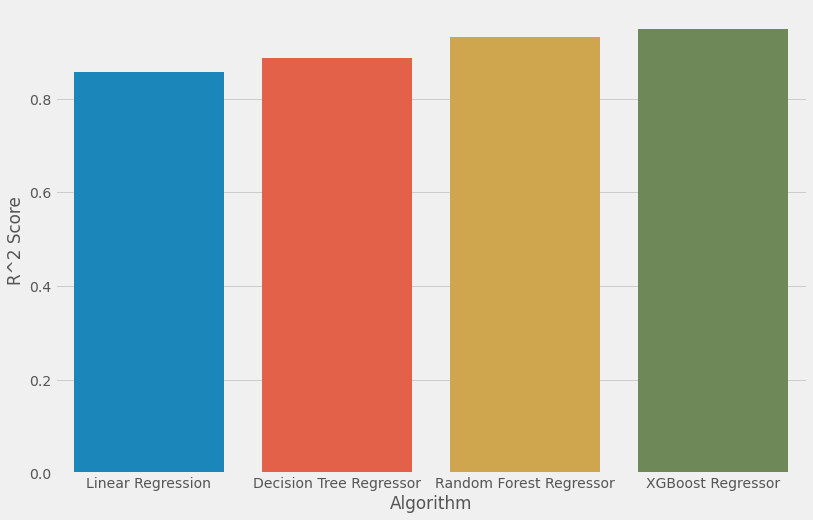

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.show()